In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
import random
from typing import TypedDict


class Theta(TypedDict):
    mu: float
    sigma: float
    pi: float


thetas: list[Theta] = [
    {"mu": 0, "sigma": 1, "pi": 0.5},
    {"mu": 5, "sigma": 3, "pi": 0.2},
    {"mu": -3, "sigma": 3, "pi": 0.3},
]


def generate_x(theta: dict):
    return [
        random.gauss(theta["mu"], theta["sigma"])
        for _ in range(0, int(100 * theta["pi"]))
    ]


x_from_theta_1 = generate_x(thetas[0])
x_from_theta_2 = generate_x(thetas[1])
x_from_theta_3 = generate_x(thetas[2])
xs = x_from_theta_1 + x_from_theta_2 + x_from_theta_3

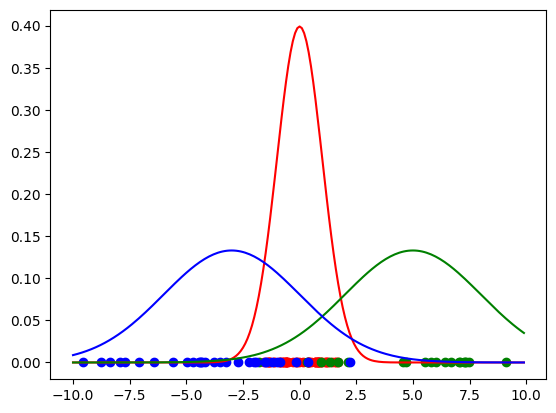

In [3]:
x_plot = np.arange(-10, 10, 0.1)
norm_theta1 = norm.pdf(x_plot, thetas[0]["mu"], thetas[0]["sigma"])
norm_theta2 = norm.pdf(x_plot, thetas[1]["mu"], thetas[1]["sigma"])
norm_theta3 = norm.pdf(x_plot, thetas[2]["mu"], thetas[2]["sigma"])

axes = plt.subplot()
axes.plot(x_plot, norm_theta1, color="red")
axes.scatter(x_from_theta_1, [0 for i in x_from_theta_1], color="red")
axes.plot(x_plot, norm_theta2, color="green")
axes.scatter(x_from_theta_2, [0 for i in x_from_theta_2], color="green")
axes.plot(x_plot, norm_theta3, color="blue")
axes.scatter(x_from_theta_3, [0 for i in x_from_theta_3], color="blue")

In [4]:
initial_thetas: list[Theta] = [
    {"mu": 0, "sigma": 1, "pi": 0.3},
    {"mu": 1, "sigma": 1, "pi": 0.3},
    {"mu": -1, "sigma": 1, "pi": 0.4},
]

In [5]:
def calc_gammas(x, given_thetas: list[Theta]):
    p_x_marginalized = sum(
        [theta["pi"] * norm.pdf(x, theta["mu"], theta["pi"]) for theta in given_thetas]
    )
    e_z = [
        theta["pi"] * norm.pdf(x, theta["mu"], theta["pi"]) / p_x_marginalized
        for theta in given_thetas
    ]
    return e_z

In [6]:
def test_e_step(xs, given_thetas):
    xs_sorted = sorted(xs)
    gamma_n_m = [calc_gammas(x, given_thetas) for x in xs_sorted]

    N_1 = sum([gamma_i[0] for gamma_i in gamma_n_m])
    N_2 = sum([gamma_i[1] for gamma_i in gamma_n_m])
    N_3 = sum([gamma_i[2] for gamma_i in gamma_n_m])

    # xの値ごとに負担率を計算するのは、k平均法で言えば所属するクラスタを決めることに相当する
    # したがって、計算の前後でクラスタに所属するxの数 ≒ 正規分布mから生まれたxの期待値 が変わるのは当然
    print(f"{N_1=}, {len(xs_sorted) * given_thetas[0]['pi']=}")
    print(f"{N_2=}, {len(xs_sorted) * given_thetas[1]['pi']=}")
    print(f"{N_3=}, {len(xs_sorted) * given_thetas[2]['pi']=}")


test_e_step(xs, initial_thetas)

N_1=np.float64(12.679575616300168), len(xs_sorted) * given_thetas[0]['pi']=30.0
N_2=np.float64(33.746858455063446), len(xs_sorted) * given_thetas[1]['pi']=30.0
N_3=np.float64(53.573565928636384), len(xs_sorted) * given_thetas[2]['pi']=40.0


In [7]:
def calc_mus(xs, gamma_n_m, N_m: list[float]):
    try:
        # 対数尤度をμで微分...した結果がこちらの式です
        mus = [
            sum([x * gamma_n_m[i][0] for i, x in enumerate(xs)]) / N_m[0],
            sum([x * gamma_n_m[i][1] for i, x in enumerate(xs)]) / N_m[1],
            sum([x * gamma_n_m[i][2] for i, x in enumerate(xs)]) / N_m[2],
        ]
        return mus
    except Exception as e:
        print(f"{e=}, {len(xs)=}, {len(gamma_n_m)=}, {N_m=}")

In [8]:
def calc_sigma2s(xs, gamma_n_m, N_m: list[float], mus):
    try:
        sigma2s = [
            sum([gamma_n_m[i][0] * (x - mus[0]) ** 2 for i, x in enumerate(xs)])
            / N_m[0],
            sum([gamma_n_m[i][1] * (x - mus[1]) ** 2 for i, x in enumerate(xs)])
            / N_m[1],
            sum([gamma_n_m[i][2] * (x - mus[2]) ** 2 for i, x in enumerate(xs)])
            / N_m[2],
        ]
        return sigma2s
    except Exception as e:
        print(f"{e=}, {len(xs)=}, {len(gamma_n_m)=}, {N_m=}, {mus=}")

In [9]:
def calc_pis(N_m):
    N = sum(N_m)
    return [
        N_m[0] / N,
        N_m[1] / N,
        N_m[2] / N,
    ]

In [15]:
def fl2rgb(rgb: list[float]):
    return "".join(map(lambda f: hex(int(255 * f))[2:].zfill(2), rgb))


expected1 = "ffffff"
actual1 = fl2rgb([1, 1, 1])
assert actual1 == expected1

expected2 = "000000"
actual2 = fl2rgb([0, 0, 0])
assert actual2 == expected2

thetas=[{'mu': np.float64(0.07743685585813741), 'sigma': np.float64(0.3718626508208873), 'pi': np.float64(0.12679575616300168)}, {'mu': np.float64(2.161052453051823), 'sigma': np.float64(2.0153370401080326), 'pi': np.float64(0.33746858455063455)}, {'mu': np.float64(-1.6662266754782762), 'sigma': np.float64(4.176527992706282), 'pi': np.float64(0.5357356592863638)}]
thetas=[{'mu': np.float64(0.19913170701671748), 'sigma': np.float64(0.2558668995614421), 'pi': np.float64(0.12092477370782592)}, {'mu': np.float64(3.0790452649117324), 'sigma': np.float64(2.586527590601924), 'pi': np.float64(0.3598654532408474)}, {'mu': np.float64(-2.4762111818567147), 'sigma': np.float64(3.0347675866239205), 'pi': np.float64(0.5192097730513267)}]
thetas=[{'mu': np.float64(0.44497439924034726), 'sigma': np.float64(0.3642269363904698), 'pi': np.float64(0.23037638024415757)}, {'mu': np.float64(3.9507289628279247), 'sigma': np.float64(2.7207669929192986), 'pi': np.float64(0.2867330287381569)}, {'mu': np.float64(

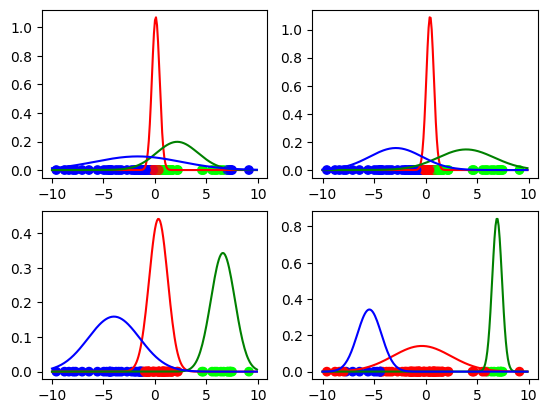

In [21]:
gammas_iter = []
thetas_iter = []


def em_algorithm(xs, given_thetas, max_iter):
    thetas = given_thetas
    iter = 0

    while True:
        # E step
        gamma_n_m = [calc_gammas(x, thetas) for x in xs]
        gammas_iter.append(gamma_n_m)

        # M step
        N_m = [
            sum([gamma_n[0] for gamma_n in gamma_n_m]),
            sum([gamma_n[1] for gamma_n in gamma_n_m]),
            sum([gamma_n[2] for gamma_n in gamma_n_m]),
        ]
        mus = calc_mus(xs, gamma_n_m, N_m)
        sigma2s = calc_sigma2s(xs, gamma_n_m, N_m, mus)
        pis = calc_pis(N_m)

        thetas: list[Theta] = [
            {"mu": mus[0], "sigma": sigma2s[0] ** (1 / 2), "pi": pis[0]},
            {"mu": mus[1], "sigma": sigma2s[1] ** (1 / 2), "pi": pis[1]},
            {"mu": mus[2], "sigma": sigma2s[2] ** (1 / 2), "pi": pis[2]},
        ]
        print(f"{thetas=}")
        thetas_iter.append(thetas)
        iter += 1
        if iter > max_iter:
            break


def plot(ax, xs, gamma_n_m, thetas):
    x_plot = np.arange(-10, 10, 0.1)
    norm_theta1 = norm.pdf(x_plot, thetas[0]["mu"], thetas[0]["sigma"])
    norm_theta2 = norm.pdf(x_plot, thetas[1]["mu"], thetas[1]["sigma"])
    norm_theta3 = norm.pdf(x_plot, thetas[2]["mu"], thetas[2]["sigma"])

    ax.plot(x_plot, norm_theta1, color="red")
    ax.plot(x_plot, norm_theta2, color="green")
    ax.plot(x_plot, norm_theta3, color="blue")
    ax.scatter(xs, [0 for i in xs], c=[f"#{fl2rgb(gamma_n)}" for gamma_n in gamma_n_m])


em_algorithm(xs, initial_thetas, 8)
_, axes = plt.subplots(2, 2)
plot(axes[0][0], xs, gammas_iter[0], thetas_iter[0])
plot(axes[0][1], xs, gammas_iter[2], thetas_iter[2])
plot(axes[1][0], xs, gammas_iter[4], thetas_iter[4])
plot(axes[1][1], xs, gammas_iter[6], thetas_iter[6])